
<h1 align="center"> Data Science with Kaggle Decal </h1>
<h2 align="center"> Day 2 - Intro to Python </h2>

In [1]:
%matplotlib inline

## Contents
* [Why Python?](#Why-Python?)
    - [Why Not MATLAB?](#Why-Not-MATLAB?)
    - [Why Python 3?](#Why-Python-3?)
* [How Python?](#How-Python?)
* [More Python!](#More-Python!)

*these links only work in the interactive version of the document*

## Why Python?

Python is, as of August 2016, one of the top five most popular programming languages according to the [TIOBE Index](http://www.tiobe.com/tiobe-index/). Of the five most popular languages, it is universally acclaimed as the easiest to use, as it operates at a higher level of abstraction than the other top contenders. This has lead to Python becoming the language of choice for teaching introductory computer science ([data as of 2014](http://cacm.acm.org/blogs/blog-cacm/176450-python-is-now-the-most-popular-introductory-teaching-language-at-top-us-universities/fulltext)) and the second-most popular language for data science ([data as of 2015](http://thenextweb.com/dd/2016/04/08/start-using-python-andor-r-data-science-one-best/#gref)).

Python emphasizes the human side of coding: it is considered more important in Python for a human programmer to be able to easily and quickly understand what a piece of code does and why than it is for that code to run quickly when implemented by a machine. This is especially important in an educational setting where understanding is paramount and speed is secondary.

### Why Python 3?

Some people may be coming in using Python 2.7, even though the current (as of August 19, 2016) release version of Python is 3.5. This is due to the non-backwards-compatibility of Python 3, which meant that many scientific computing libraries were slow to update. As recently as two years ago, there were still many packages that were only available in 2.7, but there has been a sea change, and almost all packages are 3-compatible, and soon some of them will only support Python 3.

A notable benefit of using a general-purpose open-source language like Python is that you won't be forced to uninstall any version of Python that you currently have. Many of you probably have the [Anaconda distribution](https://store.continuum.io/cshop/anaconda/) of Python, and so have a built-in system for managing multiple Python versions. We'll be using virtual environments, which achieve the same thing but are more lightweight.

One big benefit of Python 3.5 for this course is something that appears quite small: matrix/vector multiplication in Python now has its own operator: `@`. In past versions of Python, taking a dot product involved using the function `np.dot`. This may seem small, but it means that instead of having to write and read expressions like:
```
    dw = np.dot((dataset-np.dot(weights,output)),output.T)
```
you'll find:
```
    dw = (dataset - weights @ output) @ output.T
```
which looks a lot more like the math:

$$
    \Delta w = (D - W \cdot O) \cdot O^{T}
$$

and is hopefully easier to read (or at least, it will be a few weeks into the course!).

## How Python?

The following is based on a tutorial from [Jess Hamrick](http://www.jesshamrick.com/), a Berkeley PhD student in Tom Griffiths' Lab who is also one of the heads of the Jupyter project.

As in most programming languages, in Python we assign names to variables and apply functions to variables in order to transform them -- to perform computations.

We'll briefly review some of the major syntax you need to work in Python.

### `from __future__ import jetpack`

When you start up a Python environment (e.g. when you open a Jupyter notebook), there is only a small set of [data structures and functions](https://docs.python.org/3.5/library/), called the "standard library".

In order to do most things we're doing in this course, we need the following libraries:

- [`NumPy`](http://docs.scipy.org/doc/numpy/user/index.html) is a numerical computing library that adds support for vector and matrix math to Python. It's a big and powerful library, so it can be a bit intimidating. If you have experience with a different language, check out one of these specific guides:
    * [NumPy for Matlab Users](http://mathesaurus.sourceforge.net/matlab-numpy.html)
    * [NumPy for R/S+ Users](http://mathesaurus.sourceforge.net/r-numpy.html)
    
- [`matplotlib`](http://matplotlib.org/resources/index.html) is a plotting library that uses a MATLAB-esque syntax. Plotting and visualizing data is a key skill for any scientist, so I strongly recommend following the link above and checking out some of the tutorials so that you can become a master plotter!

We load up these libraries with `import` statements. We additionally give the library a shorter nickname using the `as` keyword:

In [8]:
import numpy as np
np

<module 'numpy' from '/Users/charlesfrye/anaconda/envs/jupy/lib/python3.5/site-packages/numpy/__init__.py'>

Now, we can access all of the functions inside the module `numpy`, like `numpy.zeros` and `numpy.multiply` by typing `np.zeros` and so on. The `.` symbol in Python means that we're looking for a thing, like a variable or a function, inside another thing. This means we can have a function `dot` that does something different from `np.dot` and Python won't get confused about which `dot` we're looking for. Radical!

We can also have things that are inside things. In fact, there's no reasonable limit on the number of times we can "go meta" here. It's `.turtles` all the way down!

Let's make use of that to bring in a very important sub-component of `matplotlib` that has its own sub-components:

In [9]:
import matplotlib.pyplot as plt

We'll be using all of the `matplotlib` functionality from within `pyplot` -- or, as far as we're concerned, `plt`. Let's use some `numpy` functions to generate a basic plot.

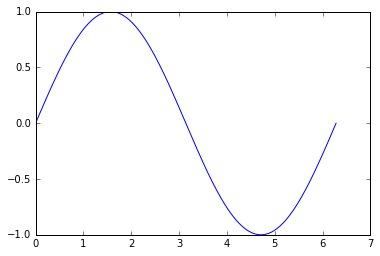

In [10]:
x = np.linspace(0,2*np.pi,200) #evenly-spaced numbers from 0 to 2π
y = np.sin(x)

plt.plot(x,y); plt.show()

Thanks to the power of Jupyter notebooks, the plot is displayed inline! This is thanks to the first cell in this notebook, which contains the `magic` command (yes, really) `%matplotlib inline`.

### `for` loops and lists

In Python as in many other languages, we use `for` loops to tell the computer to do the same thing over and over. For example, the following prints the numbers from `0` to `9`:

In [11]:
for number in range(10): #note the colon
    print(number) #note the four spaces!

0
1
2
3
4
5
6
7
8
9


Much easier than writing `print(1)`, then `print(2)`, etc. Boring stuff like repeating yourself is the job of computers, not people!

One thing that surprises new Python programmers is that the blank spaces are important to make the code above work. Any time you do a `for` loop, you need to indent all of the code that's supposed to be repeated. This includes when you're doing a `for` loop inside a `for` loop! Jupyter does a good job of handling the blank spaces for you, but it's something to watch out for.

`for` loops are so important that Python let's you do them over things that aren't just arrays of numbers!

In [2]:
friends = ['joey', 'rachel', 'phoebe', 'avocado'] 
#this is how you specify a list of things, 
# like a list of your friends: [friend0, friend1, friend2]

You can easily index inside of a list by giving giving either a positional index or using a slicing notation:

In [3]:
friends[0]

'joey'

In [4]:
friends[:3]

['joey', 'rachel', 'phoebe']

Slicing notation syntax is such that the index before the column represents where to start in the list and the index after the column represents where to end in the list. An empty space defaults to 0 for the former case and the length of the list for the latter case.

Oftentimes, you will also see a two colon slice notation. This is the same thing as previously (imagine the colons as creating three different positional arguments) except the last space is the *step size*. A step size of 2 would skip every other element. A step size of -1 reverses the order of your slice.

In [6]:
friends[::-1]

['avocado', 'phoebe', 'rachel', 'joey']

In [18]:
for person in friends:
    print('i love my friend '+person)

i love my friend joey
i love my friend rachel
i love my friend phoebe
i love my friend avocado


Of course, that takes up a lot of space. Python also offers an even more compact way of writing for loops:

In [19]:
[print('i love my friend '+person) for person in friends];

i love my friend joey
i love my friend rachel
i love my friend phoebe
i love my friend avocado


This is called a "list comprehension" and it turns one list of values into another. List comprehensions are a nice way to save space, but they can be hard to read, especially when the list at the end is also made from a list comprehension!

### Arrays

Arrays come from `numpy`, and they are very similar to lists: they're containers for big collections of objects. In fact, we can turn a list into an array by using `np.asarray(list)`. However, they act more like matrices and vectors than like lists of objects. For example, we can multiply them:

In [14]:
vector = np.asarray([1,2,3]) # the vector [1,2,3]
matrix = np.zeros((3,3)) # a matrix of all zeros

vectorVectorProduct = vector @ vector #vector multiplication
vectorMatrixProduct = matrix @ vector #matrix multiplication

print('vector: {0}'.format(vector))
print('matrix: \n {0}'.format(matrix))
print('vec-mat product: {0}'.format(vectorMatrixProduct))
print('vec-vec product: {0}'.format(vectorVectorProduct))

vector: [1 2 3]
matrix: 
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]
vec-mat product: [ 0.  0.  0.]
vec-vec product: 14


We'll be multiplying a lot of matrices in this class. One thing that often trips people up is making sure that their matrices are aligned: an $M$ by $N$ matrix can only multiply an $N$ vector or and $N$ by $K$ matrix. We can track these very important numbers by using `array.shape`:

In [15]:
print(vector.shape)
matrix.shape

(3,)


(3, 3)

Note that `shape` is a property of every array, just like `pyplot` was a property of `matplotlib`, so it shows up after a `.`

Note also that I didn't use a `print` function on `matrix.shape`. That's because, by default, Jupyter notebooks show you the result of running the final line (and only the final line). MATLAB does something similar for every line, except those that end with semicolons (`;`). You can similarly prevent the notebook from printing the results of the last line by including a semicolon:

In [16]:
matrix.shape; #nothing shows up!

## More Python!

There's a ton more Python to learn!

[The blog post](http://bastibe.de/2013-01-20-a-python-primer-for-matlab-users.html) linked all the way back at the start is written to help MATLAB users learn to use Python. It has lots of nice links to the [official Python tutorial](https://docs.python.org/3.3/tutorial/) and the [SciPy cookbook](http://scipy-cookbook.readthedocs.io/), which has lots of recipes specialized for the problems scientists need to solve with Python.